In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
#Choropleth Maps Visualization
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [56]:
#whr = World Happiness Report 2021
whr = pd.read_csv('world-happiness-report-2021.csv')
whr.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [57]:
#Getting the bigger picture of the data
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [58]:
#196 countries in this world, data isn't fully complete
whr['Country name'].nunique()

149

In [59]:
whr.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


<AxesSubplot:>

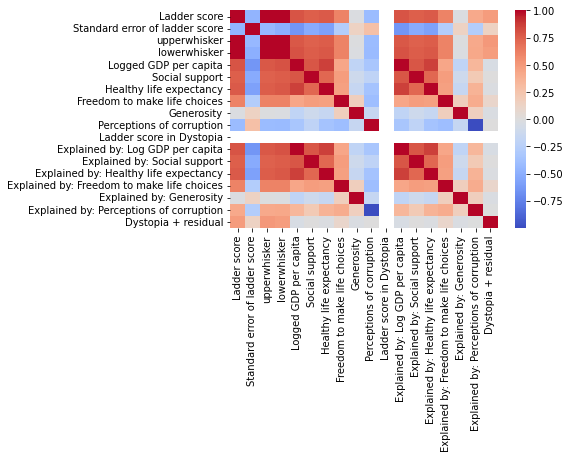

In [60]:
#Checking the correlation between columns
sns.heatmap(whr.corr(), cmap = 'coolwarm')

In [61]:
#Top countries with most social support
whr.sort_values(by = ['Social support'], ascending = False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876
98,Benin,Sub-Saharan Africa,5.045,0.073,5.189,4.901,8.087,0.489,54.713,0.757,-0.034,0.661,2.43,0.507,0.058,0.196,0.457,0.166,0.178,3.482


C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Social support', ylabel='Density'>

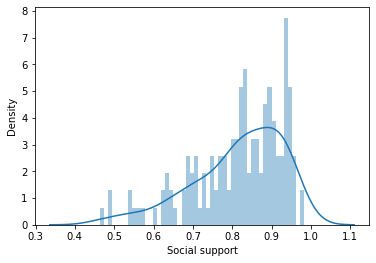

In [62]:
#Distribution plot of Social support
sns.distplot(whr['Social support'],
            bins = 50)

In [63]:
data1 = dict(type='choropleth',
           colorscale = 'Viridis',
           reversescale = True, 
           locations = whr['Country name'],
           locationmode = "country names",
           z = whr['Social support'],
           text=whr['Country name'],
           colorbar = {'title':'Social Support'})

data1

{'type': 'choropleth',
 'colorscale': 'Viridis',
 'reversescale': True,
 'locations': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'locationmode': 'country names',
 'z': 0      0.954
 1      0.954
 2      0.942
 3      0.983
 4      0.942
        ...  
 144    0.787
 145    0.784
 146    0.552
 147    0.750
 148    0.463
 Name: Social support, Length: 149, dtype: float64,
 'text': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'colorbar': {'title': 'Social Support'}}

In [64]:
layout = dict(title = 'Social Support Of Every Country',
             geo = dict(showframe = False,
                       projection = {'type':'orthographic'}))

choromap = go.Figure(data = [data1],layout = layout)
iplot(choromap,validate=False)

In [65]:
#Top countries with most healthy life expectancy
whr.sort_values(by = ['Healthy life expectancy'], ascending = False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
55,Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
26,Spain,Western Europe,6.491,0.042,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43,1.375,1.057,0.826,0.462,0.135,0.124,2.513
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Swaziland,Sub-Saharan Africa,4.308,0.071,4.448,4.168,9.065,0.770,50.833,0.647,-0.185,0.708,2.43,0.849,0.693,0.074,0.323,0.067,0.147,2.155
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,-0.016,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469
115,Nigeria,Sub-Saharan Africa,4.759,0.052,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800


C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Density'>

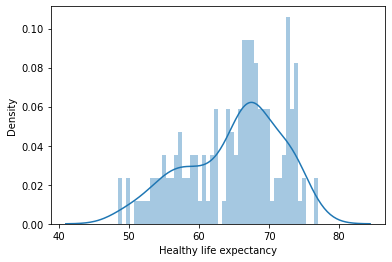

In [66]:
#Distribution plot of Healthy life expectancy
sns.distplot(whr['Healthy life expectancy'],
            bins = 50)

In [67]:
data2 = dict(type='choropleth',
           colorscale = 'Viridis',
           reversescale = True, 
           locations = whr['Country name'],
           locationmode = "country names",
           z = whr['Healthy life expectancy'],
           text=whr['Country name'],
           colorbar = {'title':'Healthy Life Expectancy'})

data2

{'type': 'choropleth',
 'colorscale': 'Viridis',
 'reversescale': True,
 'locations': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'locationmode': 'country names',
 'z': 0      72.000
 1      72.700
 2      74.400
 3      73.000
 4      72.400
         ...  
 144    48.700
 145    59.269
 146    61.400
 147    56.201
 148    52.493
 Name: Healthy life expectancy, Length: 149, dtype: float64,
 'text': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'colorbar': {'title': 'Healthy Life Expectancy'}}

In [68]:
layout = dict(title = 'Healthy Life Expectancy Of Every Country',
             geo = dict(showframe = False,
                       projection = {'type':'orthographic'}))

choromap = go.Figure(data = [data2],layout = layout)
iplot(choromap,validate=False)

In [69]:
#Top countries with most freedom to make life choices
whr.sort_values(by = ['Freedom to make life choices'], ascending = False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,6.312,6.045,8.836,0.918,65.255,0.970,0.311,0.515,2.43,0.769,1.027,0.528,0.716,0.391,0.271,2.477
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
113,Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,0.034,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Madagascar,Sub-Saharan Africa,4.208,0.072,4.349,4.068,7.396,0.686,59.305,0.552,-0.005,0.803,2.43,0.266,0.503,0.341,0.207,0.185,0.087,2.620
130,Comoros,Sub-Saharan Africa,4.289,0.084,4.454,4.123,8.031,0.626,57.349,0.548,0.082,0.781,2.43,0.488,0.367,0.279,0.202,0.241,0.101,2.610
122,Lebanon,Middle East and North Africa,4.584,0.055,4.691,4.477,9.626,0.848,67.355,0.525,-0.073,0.898,2.43,1.045,0.868,0.595,0.175,0.140,0.026,1.736
108,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242


C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Density'>

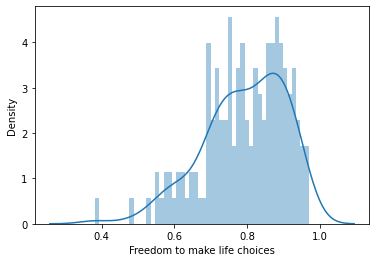

In [70]:
#Distribution plot of Freedom to make life choices
sns.distplot(whr['Freedom to make life choices'],
            bins = 50)

In [71]:
data3 = dict(type='choropleth',
           colorscale = 'Viridis',
           reversescale = True, 
           locations = whr['Country name'],
           locationmode = "country names",
           z = whr['Freedom to make life choices'],
           text=whr['Country name'],
           colorbar = {'title':'Freedom Of Making Life Choices'})

data3

{'type': 'choropleth',
 'colorscale': 'Viridis',
 'reversescale': True,
 'locations': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'locationmode': 'country names',
 'z': 0      0.949
 1      0.946
 2      0.919
 3      0.955
 4      0.913
        ...  
 144    0.715
 145    0.824
 146    0.897
 147    0.677
 148    0.382
 Name: Freedom to make life choices, Length: 149, dtype: float64,
 'text': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'colorbar': {'title': 'Freedom Of Making Life Choices'}}

In [72]:
layout = dict(title = 'The Freedom Of Making Life Choices Of Every Country',
             geo = dict(showframe = False,
                       projection = {'type':'orthographic'}))

choromap = go.Figure(data = [data3],layout = layout)
iplot(choromap,validate=False)

In [73]:
#Top countries with most generosity
whr.sort_values(by = ['Generosity'], ascending = False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
81,Indonesia,Southeast Asia,5.345,0.056,5.454,5.235,9.365,0.811,62.236,0.873,0.542,0.867,2.43,0.954,0.786,0.433,0.598,0.541,0.046,1.987
125,Myanmar,Southeast Asia,4.426,0.052,4.527,4.324,8.541,0.779,59.302,0.876,0.509,0.660,2.43,0.666,0.713,0.341,0.601,0.520,0.178,1.407
97,Gambia,Sub-Saharan Africa,5.051,0.089,5.225,4.877,7.686,0.690,55.160,0.697,0.424,0.746,2.43,0.367,0.511,0.210,0.384,0.465,0.123,2.990
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,6.312,6.045,8.836,0.918,65.255,0.970,0.311,0.515,2.43,0.769,1.027,0.528,0.716,0.391,0.271,2.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Georgia,Commonwealth of Independent States,4.891,0.054,4.998,4.785,9.585,0.671,64.300,0.783,-0.238,0.655,2.43,1.030,0.470,0.498,0.488,0.032,0.181,2.191
57,Portugal,Western Europe,5.929,0.055,6.037,5.821,10.421,0.879,72.600,0.892,-0.244,0.887,2.43,1.323,0.939,0.760,0.621,0.029,0.033,2.225
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
55,Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048


C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Generosity', ylabel='Density'>

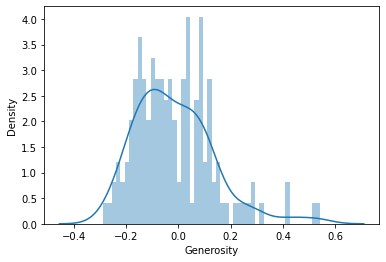

In [74]:
#Distribution plot of Generosity
sns.distplot(whr['Generosity'],
            bins = 50)

In [75]:
data4 = dict(type='choropleth',
           colorscale = 'Viridis',
           reversescale = True, 
           locations = whr['Country name'],
           locationmode = "country names",
           z = whr['Generosity'],
           text=whr['Country name'],
           colorbar = {'title':'Generosity'})

data4

{'type': 'choropleth',
 'colorscale': 'Viridis',
 'reversescale': True,
 'locations': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'locationmode': 'country names',
 'z': 0     -0.098
 1      0.030
 2      0.025
 3      0.160
 4      0.175
        ...  
 144   -0.131
 145   -0.246
 146    0.061
 147   -0.047
 148   -0.102
 Name: Generosity, Length: 149, dtype: float64,
 'text': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'colorbar': {'title': 'Generosity'}}

In [76]:
layout = dict(title = 'Generosity Of Every Country',
             geo = dict(showframe = False,
                       projection = {'type':'orthographic'}))

choromap = go.Figure(data = [data4],layout = layout)
iplot(choromap,validate=False)

In [77]:
#Top countries with most perceptions of corruption
whr.sort_values(by = ['Perceptions of corruption'], ascending = False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
59,Croatia,Central and Eastern Europe,5.882,0.048,5.975,5.788,10.217,0.924,70.799,0.754,-0.118,0.939,2.43,1.251,1.039,0.703,0.453,0.111,0.000,2.325
45,Romania,Central and Eastern Europe,6.140,0.057,6.253,6.027,10.284,0.832,67.355,0.845,-0.219,0.938,2.43,1.275,0.832,0.595,0.564,0.045,0.001,2.830
87,Bulgaria,Central and Eastern Europe,5.266,0.054,5.371,5.160,10.016,0.931,67.000,0.788,-0.096,0.932,2.43,1.181,1.055,0.583,0.494,0.125,0.005,1.823
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,0.050,5.911,5.715,9.590,0.870,68.098,0.706,0.113,0.931,2.43,1.032,0.919,0.618,0.395,0.261,0.005,2.583
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095


C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Density'>

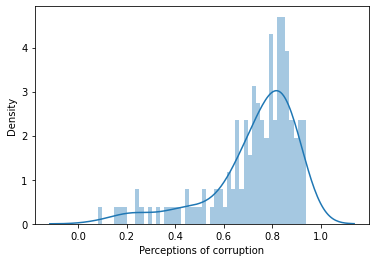

In [78]:
#Distribution plot of Perceptions of corruption
sns.distplot(whr['Perceptions of corruption'],
            bins = 50)

In [79]:
data5 = dict(type='choropleth',
           colorscale = 'Viridis',
           reversescale = True, 
           locations = whr['Country name'],
           locationmode = "country names",
           z = whr['Perceptions of corruption'],
           text=whr['Country name'],
           colorbar = {'title':'Perceptions Of Corruption'})

data5

{'type': 'choropleth',
 'colorscale': 'Viridis',
 'reversescale': True,
 'locations': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'locationmode': 'country names',
 'z': 0      0.186
 1      0.179
 2      0.292
 3      0.673
 4      0.338
        ...  
 144    0.915
 145    0.801
 146    0.167
 147    0.821
 148    0.924
 Name: Perceptions of corruption, Length: 149, dtype: float64,
 'text': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'colorbar': {'title': 'Perceptions Of Corruption'}}

In [80]:
layout = dict(title = 'Perceptions Of Corruption Of Every Country',
             geo = dict(showframe = False,
                       projection = {'type':'orthographic'}))

choromap = go.Figure(data = [data5],layout = layout)
iplot(choromap,validate=False)

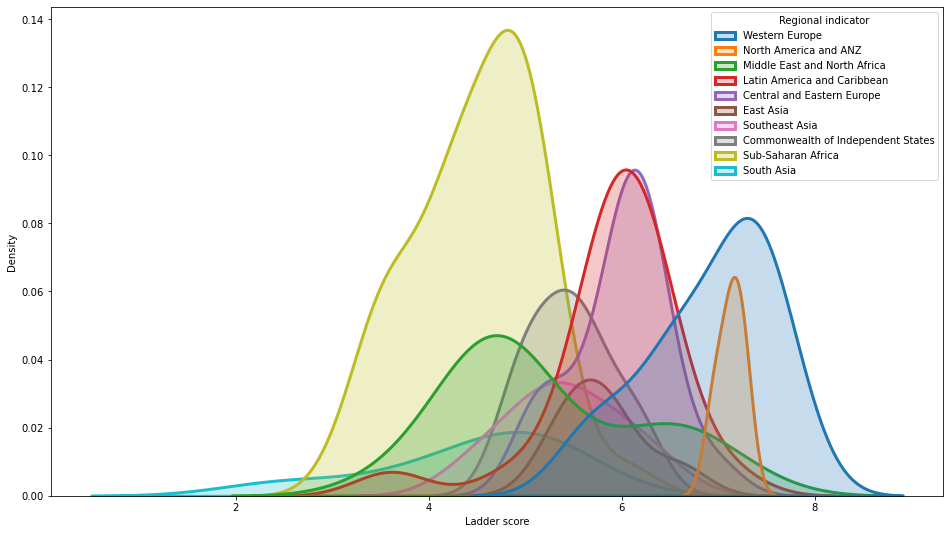

In [81]:
#Ladder Score Visualization
#Regions with the best ladder score
plt.figure(figsize = (16,9))
sns.kdeplot(whr['Ladder score'],
            hue = whr['Regional indicator'],
            fill = 'True',
            linewidth = 3)
plt.show()

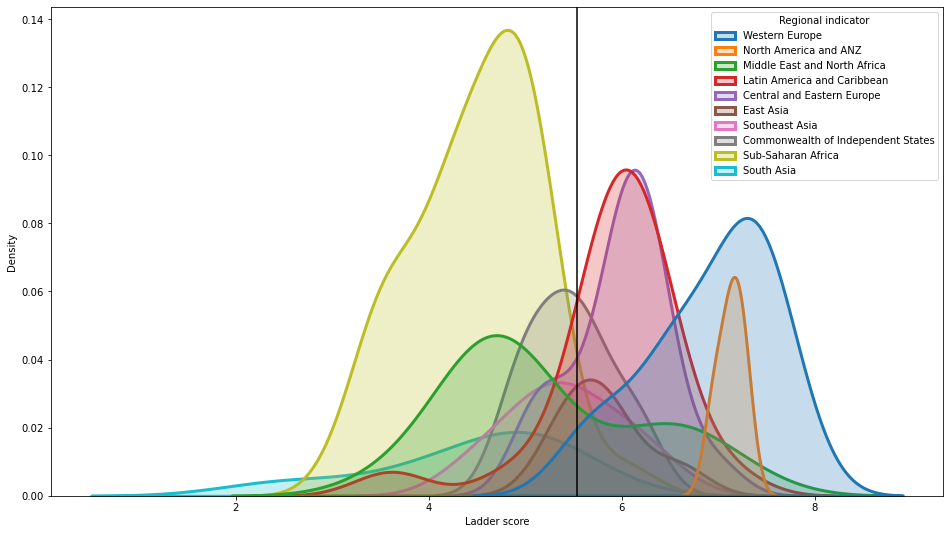

In [82]:
plt.figure(figsize = (16,9))
sns.kdeplot(whr['Ladder score'],
            hue = whr['Regional indicator'],
            fill = 'True',
            linewidth = 3)
plt.axvline(whr['Ladder score'].mean(), c = 'black')
plt.show()

In [83]:
data6 = dict(type='choropleth',
           colorscale = 'Viridis',
           reversescale = True, 
           locations = whr['Country name'],
           locationmode = "country names",
           z = whr['Ladder score'],
           text=whr['Country name'],
           colorbar = {'title':'Ladder Score'})

data6

{'type': 'choropleth',
 'colorscale': 'Viridis',
 'reversescale': True,
 'locations': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'locationmode': 'country names',
 'z': 0      7.842
 1      7.620
 2      7.571
 3      7.554
 4      7.464
        ...  
 144    3.512
 145    3.467
 146    3.415
 147    3.145
 148    2.523
 Name: Ladder score, Length: 149, dtype: float64,
 'text': 0          Finland
 1          Denmark
 2      Switzerland
 3          Iceland
 4      Netherlands
           ...     
 144        Lesotho
 145       Botswana
 146         Rwanda
 147       Zimbabwe
 148    Afghanistan
 Name: Country name, Length: 149, dtype: object,
 'colorbar': {'title': 'Ladder Score'}}

In [84]:
layout = dict(title = 'Ladder Score Of Every Country',
             geo = dict(showframe = False,
                       projection = {'type':'orthographic'}))

choromap = go.Figure(data = [data6],layout = layout)
iplot(choromap,validate=False)

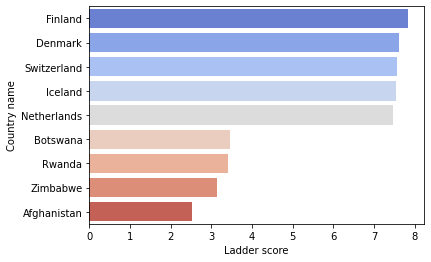

In [85]:
#5 Happiest & least happiest countries
whr2021 = whr[(whr.loc[:,'Ladder score']>7.4) | (whr.loc[:,'Ladder score']<3.5)]

sns.barplot(x='Ladder score', y='Country name', data=whr2021, palette='coolwarm')
plt.show()